In [1]:
import pandas as pd
import numpy as np
import sys
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import math as math
from pylab import rcParams
from scipy.stats import zscore 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold, train_test_split, cross_val_score

# Churn Model

In [2]:
df = pd.read_csv('C:/Users/oyeye/OneDrive/Desktop/Churn.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

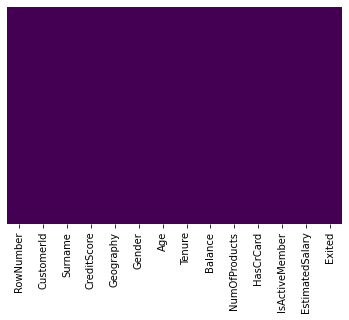

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

<AxesSubplot:xlabel='Geography', ylabel='count'>

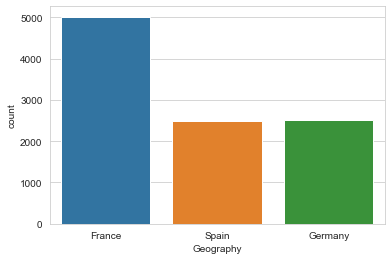

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'Geography', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

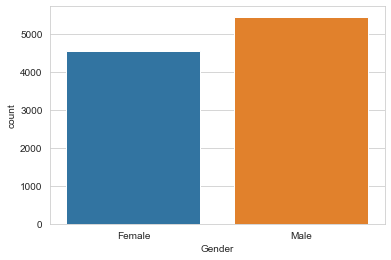

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Gender', data = df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

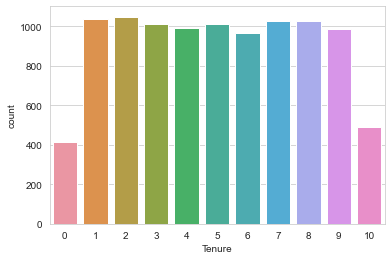

In [18]:
sns.set_style('whitegrid')
sns.countplot(x = 'Tenure', data = df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

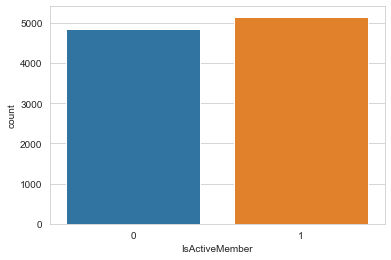

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'IsActiveMember', data = df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

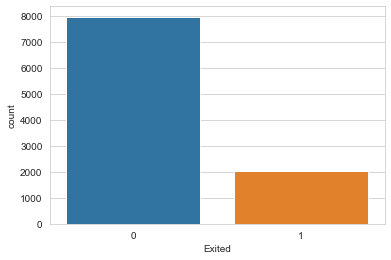

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'Exited', data = df)

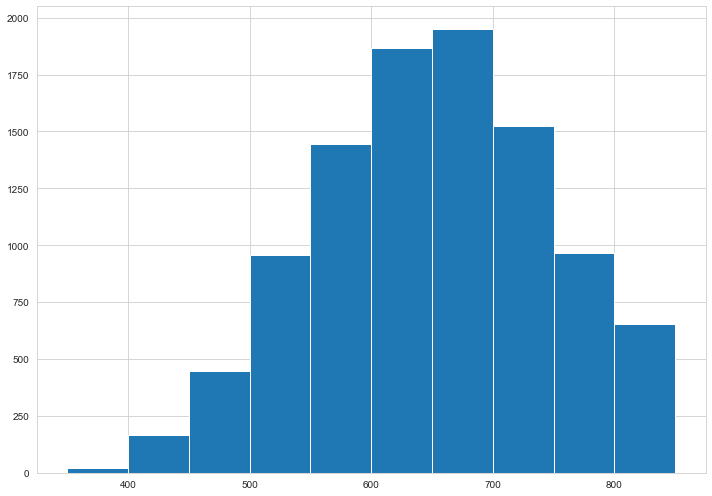

In [20]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(df['CreditScore'])
# Show plot
plt.show()

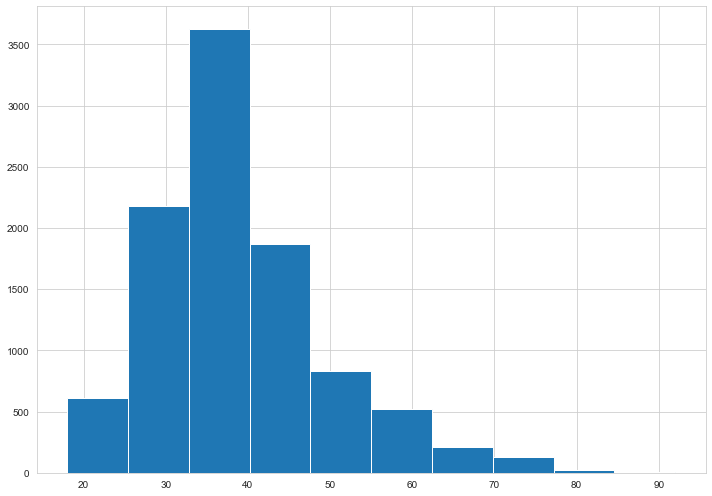

In [19]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(df['Age'])
# Show plot
plt.show()

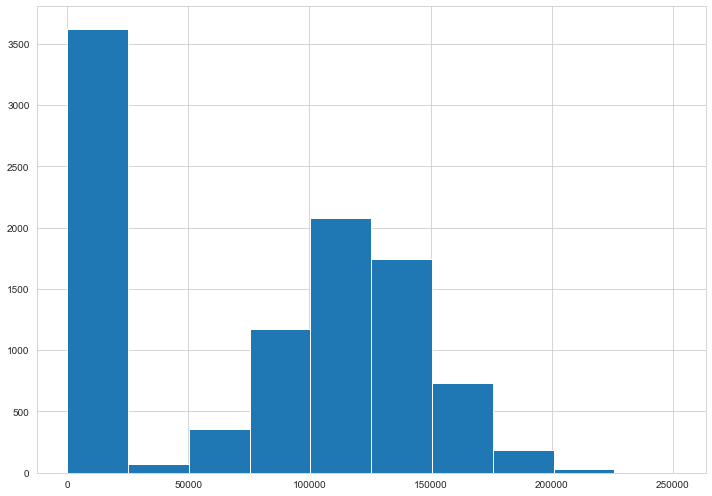

In [26]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(df['Balance'])
# Show plot
plt.show()

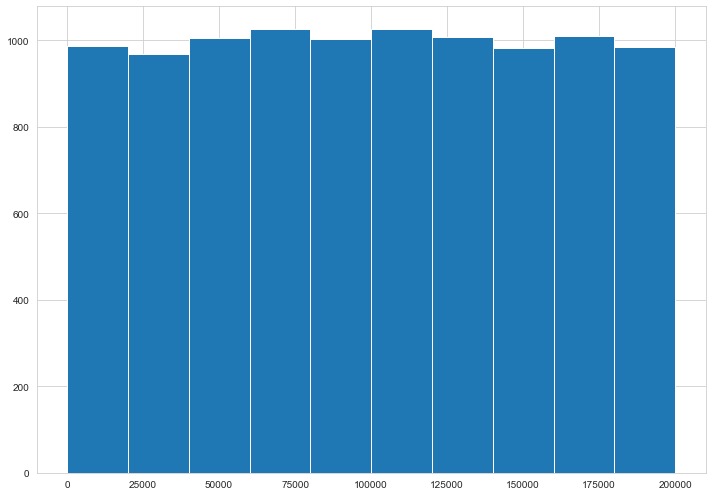

In [22]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(df['EstimatedSalary'])
# Show plot
plt.show()

C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


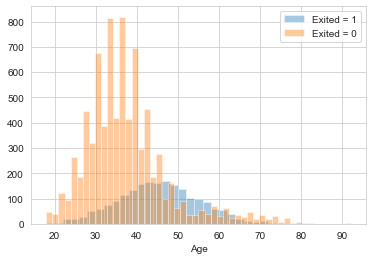

In [28]:
###########Create Histogram
df1 = df[df.Exited == 1]
sns.distplot(df1['Age'],  kde = False, label = 'Exited = 1')
df1 = df[df.Exited == 0]
sns.distplot(df1['Age'],  kde = False, label = 'Exited = 0')
plt.legend(prop = {'size': 10})

C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\oyeye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


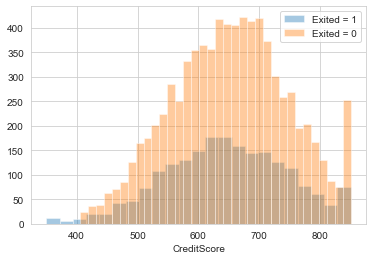

In [29]:
###########Create Histogram
df1 = df[df.Exited == 1]
sns.distplot(df1['CreditScore'],  kde = False, label = 'Exited = 1')
df1 = df[df.Exited == 0]
sns.distplot(df1['CreditScore'],  kde = False, label = 'Exited = 0')
plt.legend(prop = {'size': 10})

<AxesSubplot:>

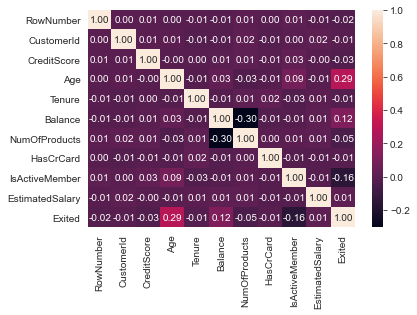

In [30]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

In [32]:
df2 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [33]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
df3 = pd.get_dummies(df2, prefix = None, columns = None, sparse = False, drop_first = False, dtype = None)

In [36]:
df3.drop(['Geography_Spain', 'Gender_Male'], axis = 1, inplace = True)

In [37]:
df3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [40]:
cols_to_norm = ['CreditScore','Balance', 'EstimatedSalary']
df3[cols_to_norm] = df3[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [41]:
df3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Female
0,0.538,42,2,0.000000,1,1,1,0.506735,1,1,0,1
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,42,8,0.636357,3,1,0,0.569654,1,1,0,1
3,0.698,39,1,0.000000,2,0,0,0.469120,0,1,0,1
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,1,0,1
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,0,1,0


In [42]:
outcome = 'Exited'
predictors = [c for c in df3.columns if c not in outcome]

In [43]:
features = df3[predictors]
target = df3[outcome]

In [44]:
target_train, target_test, features_train, features_test = train_test_split(target, features, test_size = 0.25)

In [47]:
features_train.shape

(7500, 11)

# Decision Tree Classifier

In [88]:
from sklearn import metrics
dtree = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 8)

In [89]:
dtree.fit(features_train,target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8)

In [90]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, dtree.predict(features_train))))

Training Accuracy: 0.823


In [91]:
predictions = dtree.predict(features_test)

In [92]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1961
           1       0.48      0.68      0.56       539

    accuracy                           0.77      2500
   macro avg       0.69      0.74      0.70      2500
weighted avg       0.81      0.77      0.78      2500



In [93]:
print(confusion_matrix(target_test, predictions))

[[1565  396]
 [ 174  365]]


In [94]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, dtree.predict(features_train))))
print('Test Accuracy: {:.3f}'.format(accuracy_score(target_test, predictions)))
print('AUC value is: {:.3f}'.format(roc_auc_score(target_test, predictions)))

Training Accuracy: 0.823
Test Accuracy: 0.772
AUC value is: 0.738


In [95]:
std_slc = StandardScaler()

In [96]:
pca = decomposition.PCA()

In [97]:
dec_tree = tree.DecisionTreeClassifier()

In [98]:
pipe = Pipeline(steps=[('std_slc', std_slc), ('pca', pca), ('dec_tree', dec_tree)])

In [99]:
n_components = list(range(1, features.shape[1]+1,1))

In [100]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [101]:
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

In [102]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(features, target)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11]})

In [103]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])

Best Criterion: gini


In [104]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])

Best max_depth: 8


In [105]:
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])

Best Number Of Components: 10


In [106]:
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


DecisionTreeClassifier(max_depth=8)


In [107]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

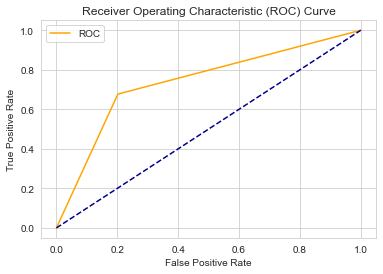

In [108]:
fper, tper, thresholds = roc_curve(target_test, predictions) 
plot_roc_curve(fper, tper)

# Logistic Regression

In [109]:
logmodel = LogisticRegression()
logmodel.fit(features_train, target_train)

C:\Users\oyeye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, logmodel.predict(features_train))))

Training Accuracy: 0.817


In [111]:
log_pred = logmodel.predict(features_test)

In [112]:
print(classification_report(target_test, log_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1961
           1       0.57      0.19      0.29       539

    accuracy                           0.79      2500
   macro avg       0.69      0.58      0.58      2500
weighted avg       0.76      0.79      0.75      2500



In [113]:
print(confusion_matrix(target_test, log_pred))

[[1884   77]
 [ 436  103]]


In [114]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, logmodel.predict(features_train))))
print('Test Accuracy: {:.3f}'.format(accuracy_score(target_test, log_pred)))
print('AUC value is: {:.3f}'.format(roc_auc_score(target_test, log_pred)))

Training Accuracy: 0.817
Test Accuracy: 0.795
AUC value is: 0.576


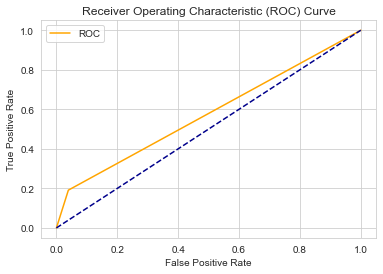

In [115]:
fper, tper, thresholds = roc_curve(target_test, log_pred) 
plot_roc_curve(fper, tper)

# Random Forest Model

In [116]:
rfc = RandomForestClassifier(n_estimators=100, random_state = 101)
rfc.fit(features_train, target_train)

RandomForestClassifier(random_state=101)

In [117]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, rfc.predict(features_train))))

Training Accuracy: 1.000


In [118]:
rfc_pred = rfc.predict(features_test)

In [119]:
print(classification_report(target_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1961
           1       0.79      0.46      0.58       539

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.85      0.86      0.84      2500



In [120]:
print(confusion_matrix(target_test, rfc_pred))

[[1897   64]
 [ 291  248]]


In [121]:
print('Training Accuracy: {:.3f}'.format(accuracy_score(target_train, rfc.predict(features_train))))
print('Test Accuracy: {:.3f}'.format(accuracy_score(target_test, rfc_pred)))
print('AUC value is: {:.3f}'.format(roc_auc_score(target_test, rfc_pred)))

Training Accuracy: 1.000
Test Accuracy: 0.858
AUC value is: 0.714


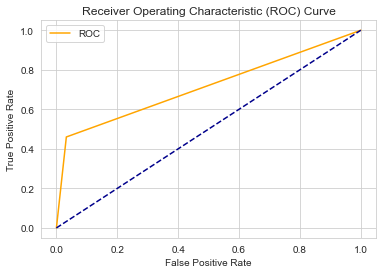

In [122]:
fper, tper, thresholds = roc_curve(target_test, rfc_pred) 
plot_roc_curve(fper, tper)